# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Regressão-Logística-usando-Softmax-no-Keras---Iris-dataset" data-toc-modified-id="Regressão-Logística-usando-Softmax-no-Keras---Iris-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regressão Logística usando Softmax no Keras - Iris dataset</a></div><div class="lev2 toc-item"><a href="#Leitura,-normalização-e-visualização-dos-dados" data-toc-modified-id="Leitura,-normalização-e-visualização-dos-dados-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Leitura, normalização e visualização dos dados</a></div><div class="lev2 toc-item"><a href="#Convertendo-rótulos-na-codificação-'one-hot'---categórico" data-toc-modified-id="Convertendo-rótulos-na-codificação-'one-hot'---categórico-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Convertendo rótulos na codificação 'one-hot' - categórico</a></div><div class="lev2 toc-item"><a href="#Construindo-o-modelo-da-rede" data-toc-modified-id="Construindo-o-modelo-da-rede-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Construindo o modelo da rede</a></div><div class="lev2 toc-item"><a href="#Compilação-do-modelo" data-toc-modified-id="Compilação-do-modelo-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Compilação do modelo</a></div><div class="lev2 toc-item"><a href="#Laço-principal-de-treinamento-da-Regressão-Logística-por-Softmax" data-toc-modified-id="Laço-principal-de-treinamento-da-Regressão-Logística-por-Softmax-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Laço principal de treinamento da Regressão Logística por Softmax</a></div><div class="lev2 toc-item"><a href="#Imprimindo-perda-e-W-finais" data-toc-modified-id="Imprimindo-perda-e-W-finais-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Imprimindo perda e W finais</a></div><div class="lev2 toc-item"><a href="#Visualizando-a-minimização-da-Perda-durante-o-treinamento" data-toc-modified-id="Visualizando-a-minimização-da-Perda-durante-o-treinamento-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Visualizando a minimização da Perda durante o treinamento</a></div><div class="lev2 toc-item"><a href="#Cálculo-do-desempenho-do-resultado" data-toc-modified-id="Cálculo-do-desempenho-do-resultado-18"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Cálculo do desempenho do resultado</a></div><div class="lev2 toc-item"><a href="#Matriz-de-Confusão" data-toc-modified-id="Matriz-de-Confusão-19"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Matriz de Confusão</a></div><div class="lev2 toc-item"><a href="#Visualização-das-fronteiras-de-decisão-no-espaço-de-atributos" data-toc-modified-id="Visualização-das-fronteiras-de-decisão-no-espaço-de-atributos-110"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Visualização das fronteiras de decisão no espaço de atributos</a></div><div class="lev2 toc-item"><a href="#Atividades" data-toc-modified-id="Atividades-111"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Atividades</a></div>

# Regressão Logística usando Softmax no Keras - Iris dataset

Este notebook reproduz o exemplo de Regressão Logística usando Softmax,
já feito utilizando programação matricial. 
Neste notebook utiliza-se o Keras, utilizando o mesmo modelo e mesmos parâmetros.

Os objetivos desta experiência são:
* Primeiros passos na utilização do Keras
    * criação rede densa de uma camada e ativação Softmax
    * compilação para preparação treinamento
    * treinamento
    * avaliação

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

import keras
from keras.utils import np_utils 
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.optimizers import SGD


Using TensorFlow backend.


## Leitura, normalização e visualização dos dados


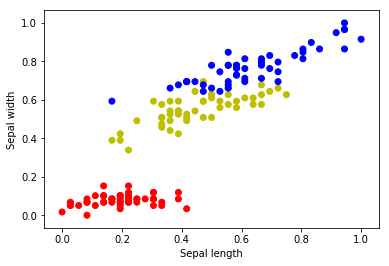

In [2]:
iris = load_iris()
X = iris.data[:,::2]  # comprimento das sépalas e pétalas, indices 0 e 2
Xc = X - X.min(axis=0)
Xc /= Xc.max(axis=0)

Y = iris.target

colors = np.array(['r','y','b'])
plt.scatter(Xc[:, 0], Xc[:, 1], c=colors[Y])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

## Convertendo rótulos na codificação 'one-hot' - categórico

In [3]:
Y_oh = np_utils.to_categorical(Y, 3) 
print(Y[0:5])
print(Y_oh[0:5])

[0 0 0 0 0]
[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]]


## Construindo o modelo da rede

Para construirmos a rede equivalente da experiência da Regressão Logística, basta colocar
* uma rede neural densa (totalmente conectada), onde o 
* número de entradas são dois, pois são dois atributos e o 
* número de saídas é 3 (número de classes). 
* Utiliza-se o Softmax como camada de ativação e a
* inicialização dos pesos deve ser zero.

**Obs:** Em geral, a inicialização dos pesos em zero não é uma boa opção. Fui utilizado aqui apenas para comparação com as implementações matriciais anteriores.

In [4]:
units = n_classes = 3 
model = Sequential() 
model.add(Dense(units, input_dim=2, activation='softmax',kernel_initializer='zero')) 


## Compilação do modelo

A compilação do modelo é a sua preparação para o treinamento. Quando se compila o modelo, deve-se escolher o método da otimização e a função de perda a ser minimizada.
Iremos utilizar o Gradiente Descendente, para isso escolhe-se o 
* SGD - Stochastic Gradient Descent e inicializa a 
* taxa de aprendizagem `lr`.

**Obs:** Observe que apesar de usarmos os SGD, este método se degrada no gradiente descendente, desde que o `batch_size` seja igual ao número total de amostras.

In [5]:
sgd = SGD(lr=0.15)
model.compile(optimizer=sgd, loss='categorical_crossentropy') 

## Laço principal de treinamento da Regressão Logística por Softmax

O treinamento via gradiente descendente acontece na função `fit`. É preciso fornecer:
* Número de iterações, aqui denominado de `nb_epoch` e
* `batch_size` que é o número de amostras utilizado a cada iteração de atualização dos pesos pelo gradiente descendente.

In [6]:
n_samples = Xc.shape[0] # number of training examples
batch_size = n_samples 
epochs = 10000
history = model.fit(Xc, Y_oh, batch_size=batch_size, epochs=epochs,verbose=0)

## Imprimindo perda e W finais

Observe que no Kera, o parâmetros são o W e o Bias, eles são separados. Nas implementaçõe anteriores por programação matricial, foi mais simples colocar a coluna de '1' no `X` para que o `W` já ficasse com o Bias. Observe abaixo que no Keras, o W tem shape: (2,3) e o Bias tem shape: (1,3)

In [7]:
loss = model.evaluate(Xc, Y_oh, verbose=0)
print('Final loss:',loss)

W = model.get_weights()
print('Bias:\n', W[1])
print('W:\n', W[0])

Final loss: 0.206978287498
Bias:
 [ 7.00967264  1.62754416 -8.63716888]
W:
 [[ -3.02196813   1.76353383   1.25843847]
 [-14.71227646  -0.67160857  15.3838644 ]]


## Visualizando a minimização da Perda durante o treinamento


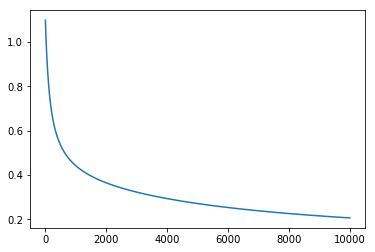

In [8]:
plt.plot(history.history['loss'])

## Cálculo do desempenho do resultado


In [9]:
Y_hat = model.predict_classes(Xc)

accuracy = np.sum(Y_hat == Y)/np.float(n_samples)
print()
print('Acurácia: ', accuracy)

 32/150 [=====>........................] - ETA: 0s
Acurácia:  0.96


## Matriz de Confusão

In [10]:
print('Matriz de confusão:')
import pandas as pd
pd.crosstab(Y_hat, Y)

Matriz de confusão:


col_0,0,1,2
row_0,,,
0,50,0,0
1,0,47,3
2,0,3,47


## Visualização das fronteiras de decisão no espaço de atributos

2720/3721 [====================>.........] - ETA: 0s

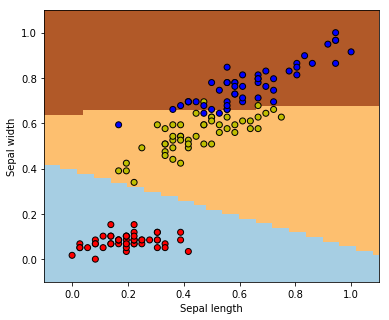

In [11]:
from Jview import FSView_keras
FSView_keras(Xc,Y,model)

## Atividades

1. Compare os valores finais de perda e W com os valores obtidos na versão utilizando programação matricial. Os valores devem ser iguais.
2. O próximo notebook será igual a este, porém com a visualização simultânea da curva de perda e das fronteiras de decisão.